## INDEX(EDA)
### 1. 데이터셋 소개. 및 사용 패키지
### 2. 자료에 대한 소개 <br>
2.1 어떠한 변수가 있는가? <br>
- 명목형 변수 <br>
- 양적 변수 <br>

2.2 각 변수의 형태 <br>
- 전체 변수 <br>
- 명목형 변수 <br>
- 양적 변수 <br>

2.3 양적 변수들의 상관관계를 파악하기 위한 상관계수 테이블 <br>
### 3. k-means <br>
- 엘보우(elbow) 기법 <br>
- 실루엣(silhouette) 기법 <br>
- k-means 전 / 후 시각화 비교 <br>
- k-means 산점도 시각화 <br>
### 4. 랜덤포레스트 <br>
- 랜덤포레스트 개념 <br>
- 랜덤포레스트 학습 <br>
- 랜덤포레스트 시각화 <br>

## 1. 제공된 DataSet의 설명 및 사용 패키지
age : 나이 <br><br>
sex : 성별(0 : 여성; 1 : 남성) <br><br>
cp : 가슴통증 유형(0 = 증상 없음 ; 1 = 비전형적 협심증; 2 = 비협심증 통증; 3 = 전형적인 협심증) <br><br>
trestbps : 평시 혈압 <br><br>
chol : 혈중 콜레스테롤 농도 <br><br>
fbs : 공복시 혈당 > 120mg/dl(0 = False; 1 = True) <br><br>
restecg : 안정 심전도 결과(0 = 좌심실 비대; 1 = 정상; 2 = ST-T파 비정상) <br><br>
thalach : 최대 심박수 <br><br>
exang : 협심증 유발 운동(0 = no; 1 = yes) <br><br>
old peak : 비교적 안정되기까지 운동으로 유발되는 ST <br><br>
slope : 최대 운동 ST segment의 기울기(0 = 하강; 1 = 평면; 2 = 상승) <br><br>
ca : 형광 투시된 주요 혈관의 수(0~3; 4 = NA) <br><br>
thal : 0 = NA; 1 = 해결된 결함; 2 = 정상; 3 = 해결가능한 결함 <br><br>
target : 심장병 진단(0 = False; 1 = True)

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.tree import export_graphviz
import six
from sklearn import tree 
# Convert to png using system command (requires Graphviz)
from subprocess import call
# Display in jupyter notebook
from IPython.display import Image
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
heart = pd.read_csv('./data/heart.csv')

In [2]:
heart.shape

(303, 14)

## 2. 자료에 대한 소개

2.1 어떤 변수가 있는가?

In [3]:
# 명목형 자료의 자료형을 문자로 변환
heart.cp = heart.cp.replace([0, 1, 2, 3], ['no_pain', 'Atypical angina', 'Angina pain', 'Typical angina']) # 가슴통증 유형
heart.restecg = heart.restecg.replace([0, 1, 2], ['Left ventricular hypertrophy', 'nomal', 'ST-T wave abnormal']) # 안정 심전도 결과
heart.slope = heart.slope.replace([0, 1, 2], ['descent', 'plane', 'Increase'])
heart.thal = heart.thal.replace([0, 1, 2, 3], [np.nan, 'Resolved Defects', 'nomal', 'Resolveable Defects'])

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    int64  
 12  thal      301 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 33.3+ KB


## 2.2 자료가 어떠한 형태를 띄는가?

In [5]:
heart.head(10)

age  sex               cp  trestbps  chol  fbs  \
0   63    1   Typical angina       145   233    1   
1   37    1      Angina pain       130   250    0   
2   41    0  Atypical angina       130   204    0   
3   56    1  Atypical angina       120   236    0   
4   57    0          no_pain       120   354    0   
5   57    1          no_pain       140   192    0   
6   56    0  Atypical angina       140   294    0   
7   44    1  Atypical angina       120   263    0   
8   52    1      Angina pain       172   199    1   
9   57    1      Angina pain       150   168    0   

                        restecg  thalach  exang  oldpeak     slope  ca  \
0  Left ventricular hypertrophy      150      0      2.3   descent   0   
1                         nomal      187      0      3.5   descent   0   
2  Left ventricular hypertrophy      172      0      1.4  Increase   0   
3                         nomal      178      0      0.8  Increase   0   
4                         nomal      163      1      0.6  Increase   0   
5                         nomal      148      0      0.4     plane   0   
6  Left ventricular hypertrophy      153      0      1.3     plane   0   
7                         nomal      173      0      0.0  Increase   0   
8                         nomal      162      0      0.5  Increase   0   
9                         nomal      174      0      1.6  Increase   0   

                  thal  target  
0     Resolved Defects       1  
1                nomal       1  
2                nomal       1  
3                nomal       1  
4                nomal       1  
5     Resolved Defects       1  
6                nomal       1  
7  Resolveable Defects       1  
8  Resolveable Defects       1  
9                nomal       1

In [6]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        2
target      0
dtype: int64

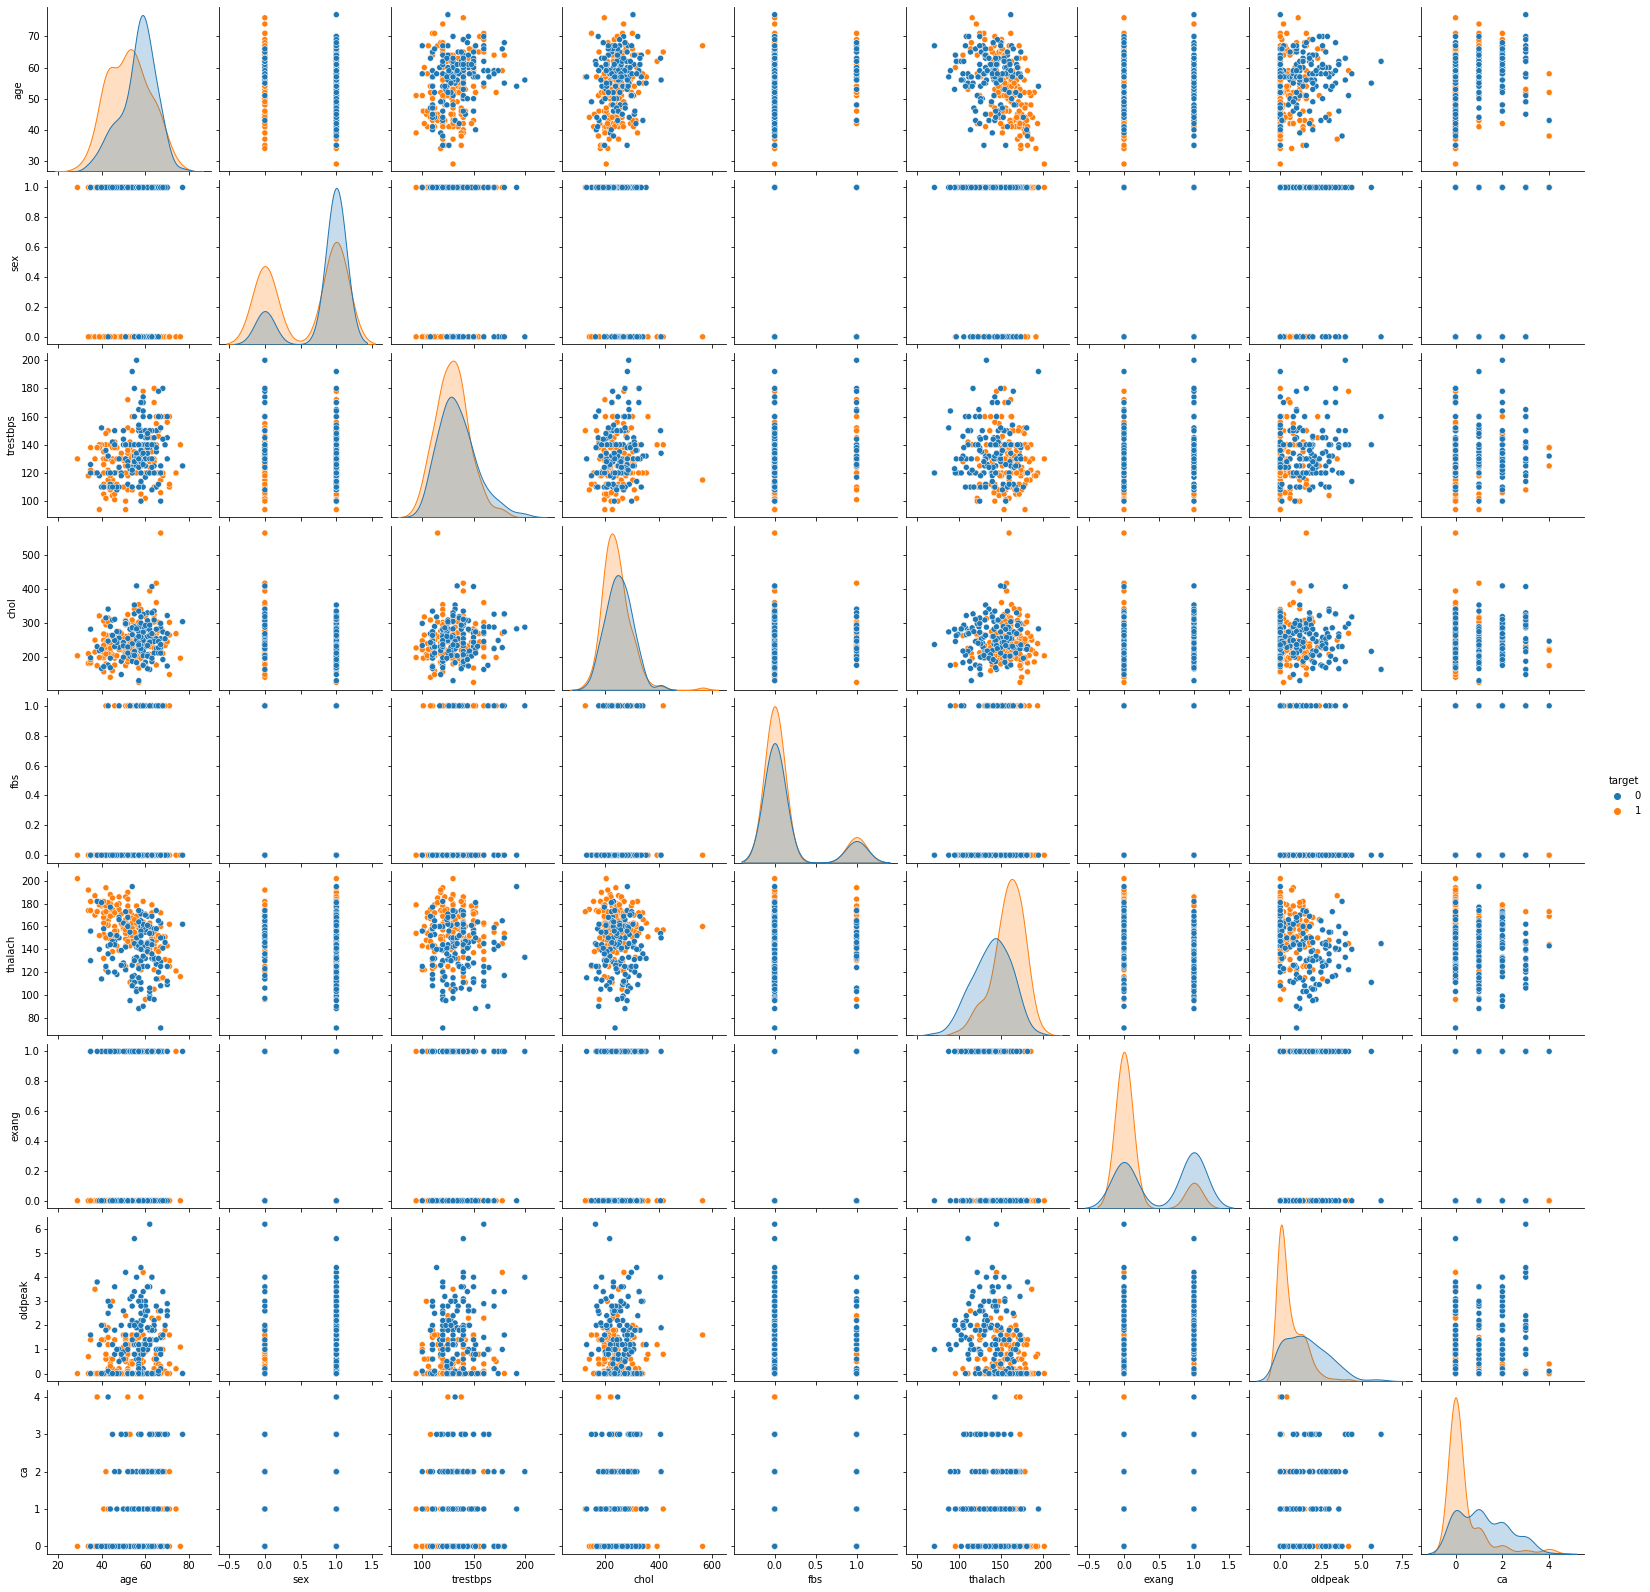

In [7]:
# 시각화
sns.pairplot(heart.dropna(), hue='target')

심장병 발병여부에 따른 분류

Text(0.5, 1.0, 'Heart Disease')

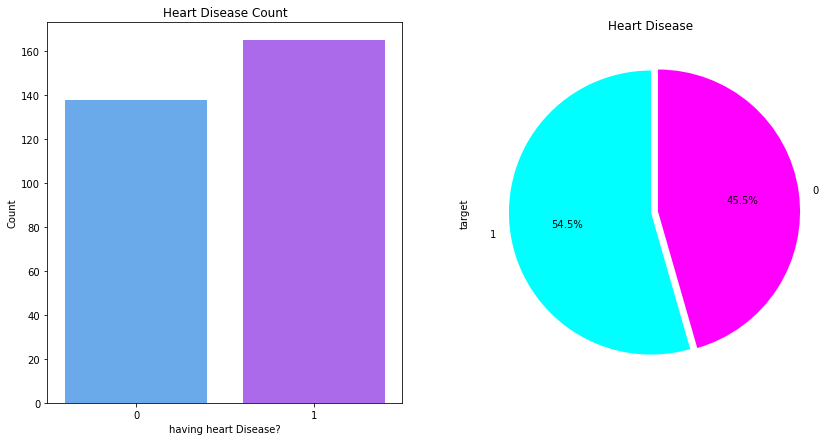

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
sns.countplot(data=heart, x='target', ax=ax[0], palette='cool')
ax[0].set_xlabel('having heart Disease?')
ax[0].set_ylabel('Count')
ax[0].set_title('Heart Disease Count')
heart['target'].value_counts().plot.pie(explode=[0, 0.05], startangle=90, autopct='%0.1f%%', ax=ax[1], cmap='cool')
plt.title('Heart Disease')

In [9]:
print(heart['target'].value_counts())
target_df = heart[heart.target==1]
nontarget_df = heart[heart.target==0]

1    165
0    138
Name: target, dtype: int64


- 전체 인구중 질병이 발생한 사람은 총 인구의 54.5%를 차지하고 있다.
- 심장병이 있는 그룹과 없는 그룹을 기준으로 데이터를 분석해보자

## 명목형 변수

In [10]:
searchList=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-11-0e09d8891461>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if index is 'sex':
<ipython-input-11-0e09d8891461>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif index is 'fbs':
<ipython-input-11-0e09d8891461>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif index is 'exang':


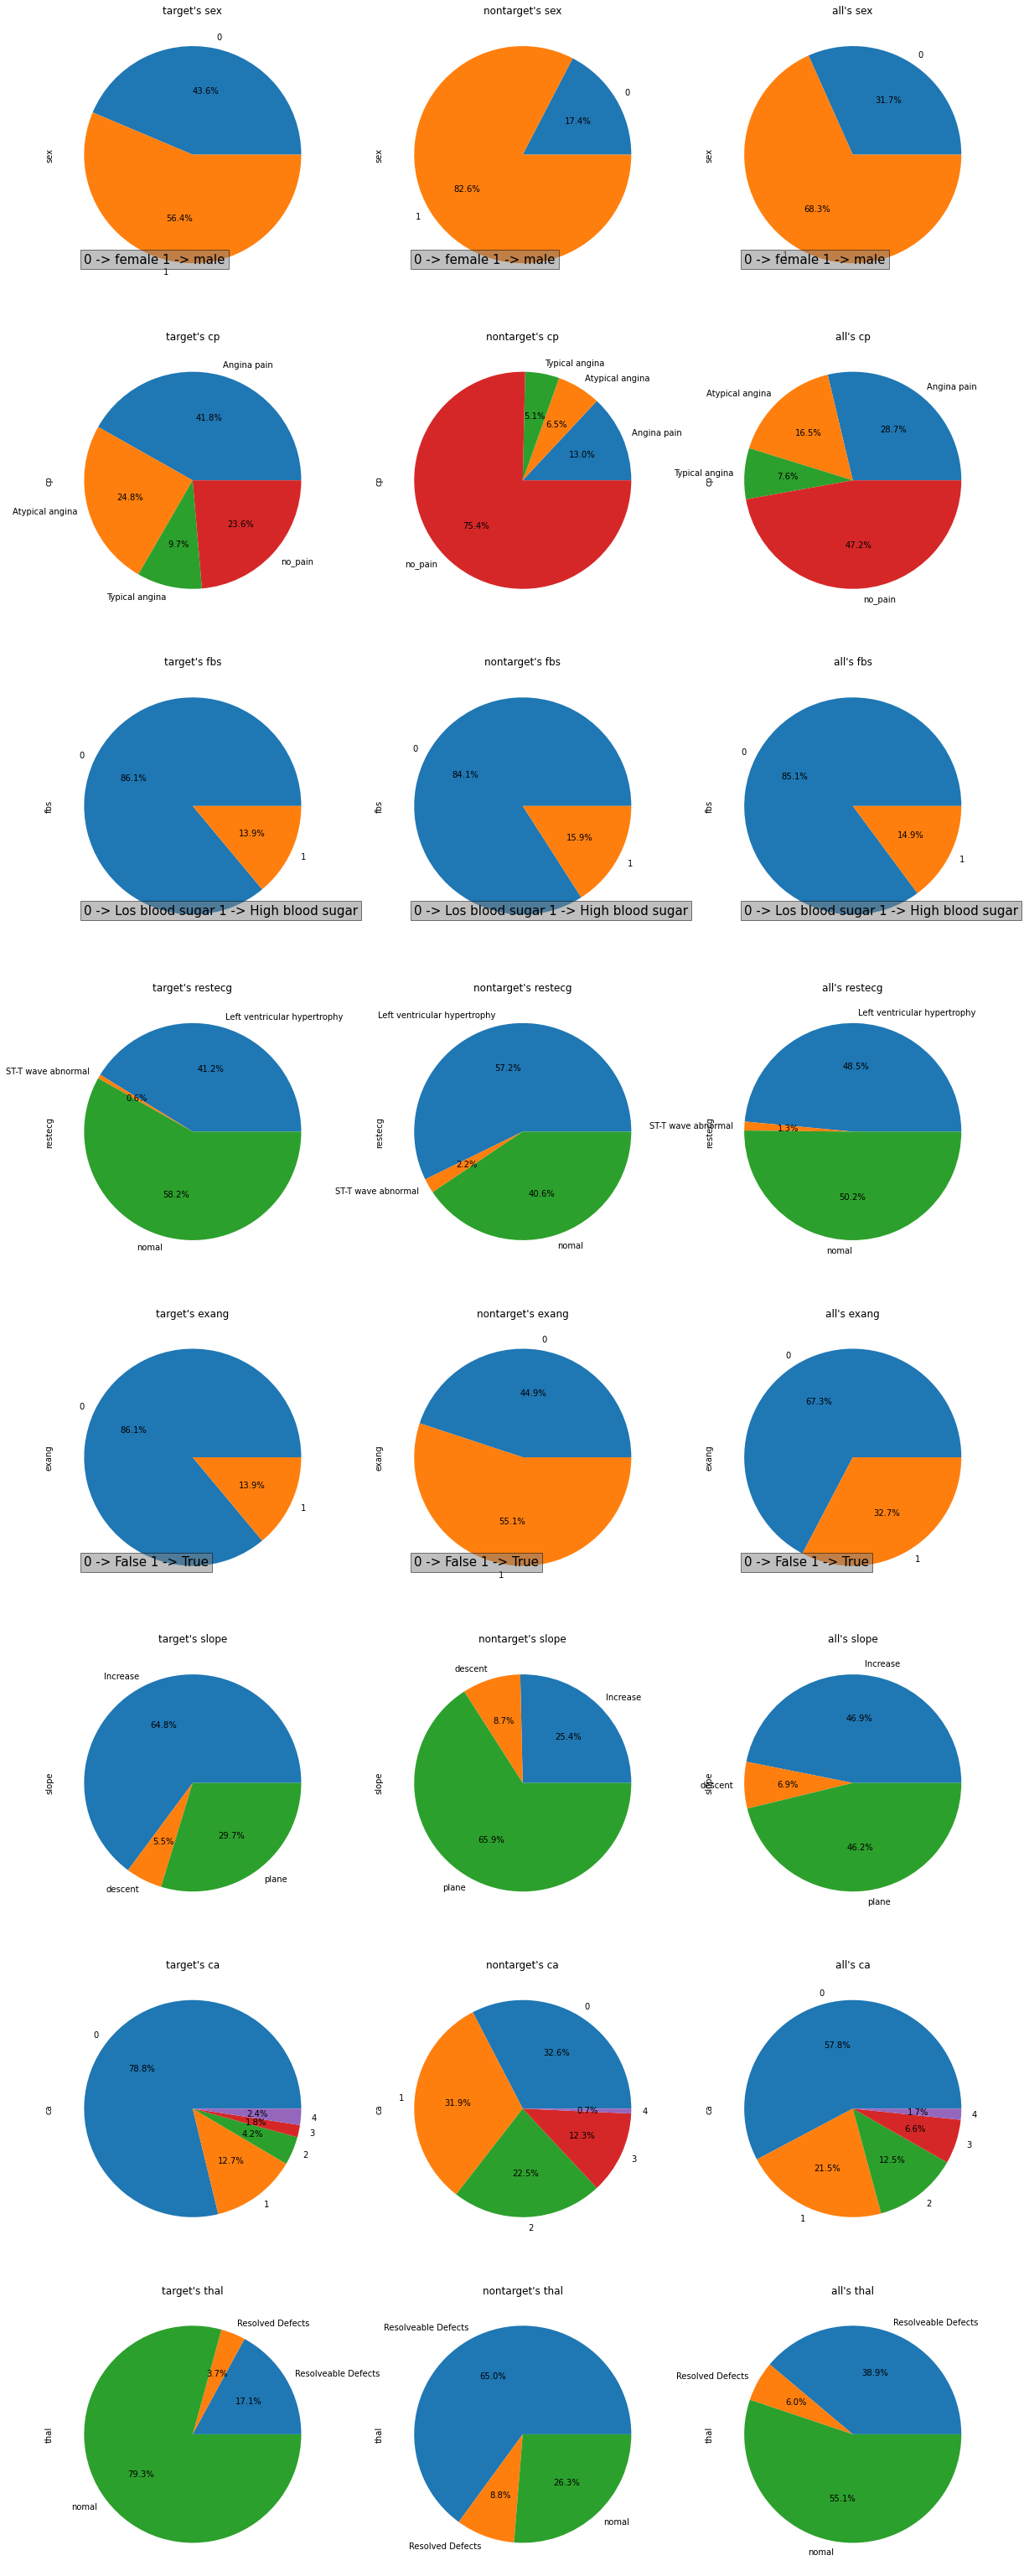

In [11]:
def showdetail(index):
    if index is 'sex':
        plt.text(-1, -1, '0 -> female 1 -> male', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index is 'fbs':
        plt.text(-1, -1, '0 -> Los blood sugar 1 -> High blood sugar', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index is 'exang':
        plt.text(-1, -1, '0 -> False 1 -> True', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))

fig, ax = plt.subplots(len(searchList), 3, figsize = (20, 7*len(searchList)))
axnum = 1

for index in searchList:
    plt.subplot(len(searchList), 3, axnum)
    plt.title('target\'s ' + index)
    target_df[index].dropna().value_counts().sort_index().plot.pie(autopct='%0.1f%%')
    showdetail(index)
    axnum += 1

    plt.subplot(len(searchList), 3, axnum)
    plt.title('nontarget\'s ' + index)
    nontarget_df[index].dropna().value_counts().sort_index().plot.pie(autopct='%0.1f%%')
    showdetail(index)
    axnum += 1

    plt.subplot(len(searchList), 3, axnum)
    plt.title('all\'s '+ index)
    heart[index].dropna().value_counts().sort_index().plot.pie(autopct='%0.1f%%')
    showdetail(index)
    axnum += 1

### 위의 결과를 통해서 알수 있는 추론
- 위의 그래프들은 각각 심장병이 있는 그룹 심장병이 없는 구룹, 전체 그룹의 각각 데이터별 비율을 나타낸다. 세 비율이 모두 비슷한 모양을 나타낼 경우 해당 데이터는 심장병에 영향을 끼치지 않는다고 생각할수 있으며, 차이가 있을 경우 심장병에 영향을 끼친다고 유추할수 있다.
- 심장병이 있는 사람과 심장병이 없는 사람은 남성이 더 많다. 하지만 표본에 있는 남성과 여성이 68.3%와 31.7%로써 2배이상 차이가 나므로 이 자체만으로 남성보다 여성이 심장병에 잘 걸릴수 있다 라는 가설을 세우기엔 부적합하다고 생각할수 있다.
- 가슴통증의 유형을 보게될 경우 심장병이 있는 사람들의 경우 76.4%의 사람들이 가슴통증을 가지며 심장병이 없는 사람의 경우 24.6%의 사람이 가슴통증을 가지고 있는것으로보아 가슴통증과 심장병사이에 관계가 있음을 유추할 수 있다
- 공복시 혈당이 120mg/dl이 넘는 사람. 즉 당뇨환자의 경우 심장병을 가진사람과 가지지 않은 사람이 비슷한 분포를 보이며 심장병과 무관하다고 유추해볼수 있다
- 안전 신전도 검사 결과또한 심장병을 가진 사람과 가지지 않은 그룹간 정상적인 사람의 비율이 58.2%, 40.6%로써 차이를 보이며 좌심실 비대에 해당하는 사람들또한 41.2%, 57.2%로써 신전도 검사 결과가 심장병과 관계가 있음을 유추할수 있다.
- 심장병이 있는 사람과 없는 사람간 협심증 유발가능성이 높은 운동을 하였는지에 대한 조사결과 심장병이 있는 그룹의 사람들이 협심증을 유발하는 운동을 한 사람들이 적고 심장병이 없는 사람들 그룹은 상대적으로 많은것을 보아 운동여부또한 심장병과 관계가 있음을 유추해 볼수 있다.
- 심장병을 가진 사람과 가지지 않은사람간에 최대 운동 ST segment의 기울기를 보았을때 가지지않은 사람과 가진 그룹이 각각 64.8% 25.4% 증가하는것을 알수 있었으며 평탄한 기울기를 가진 사람은 29.7% 65.9%를 가지며 감소하는 그래프를 가진 사람은 5.5% 8.7%로써 큰 차이를 보이지 않는것을 보아 심장병과 최대 운동 ST segment의 기울기의 관계는 최대 운동 ST segment의 기울기가 상승하는 사람의 경우 심장병의 발생율이 높다는것을 윷할수 있다.
- 형광 투시된 주요 혈관의 수의 분포를 보게 될 경우 심장병이 있는 그룹은 19.3%의 사람들이 1개이상의 형광 투시된 혈관수를 가지며 심장병이 없는 그룹의 사람들은 34.1%의 사람들이 1개이상의 형광투시된 혈관수를 가진다. 이를 통해 심장병과 형광 투시된 주요 혈관의 수는 무관하지 않다는것을 유추할 수 있다
- 심장병을 가진 그룹과 가지지 않은 그룹간 결함을 가지고 해결할수 있는지, 없는지에 대한 표에서 심장병을 가진 사람그룹에서 정상적인 사람을 많이 찾아 볼 수 있었으며, 심장병을 가지지 않은 그룹의 사람들은 극복가능한 결함을 가진 사람들의 비율이 높은것을 알수 있었으며, 이미 문제를 해결한 사람의 경우 심장병이 없는 사람 그룹에서 더 높은 비율을 보였다


## 양적변수

In [12]:
continually_index = heart.describe().columns
continually_index

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'target'],
      dtype='object')

/Users/mingggkeee/miniforge3/envs/mingggkeee/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mingggkeee/miniforge3/envs/mingggkeee/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/mingggkeee/miniforge3/envs/mingggkeee/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  

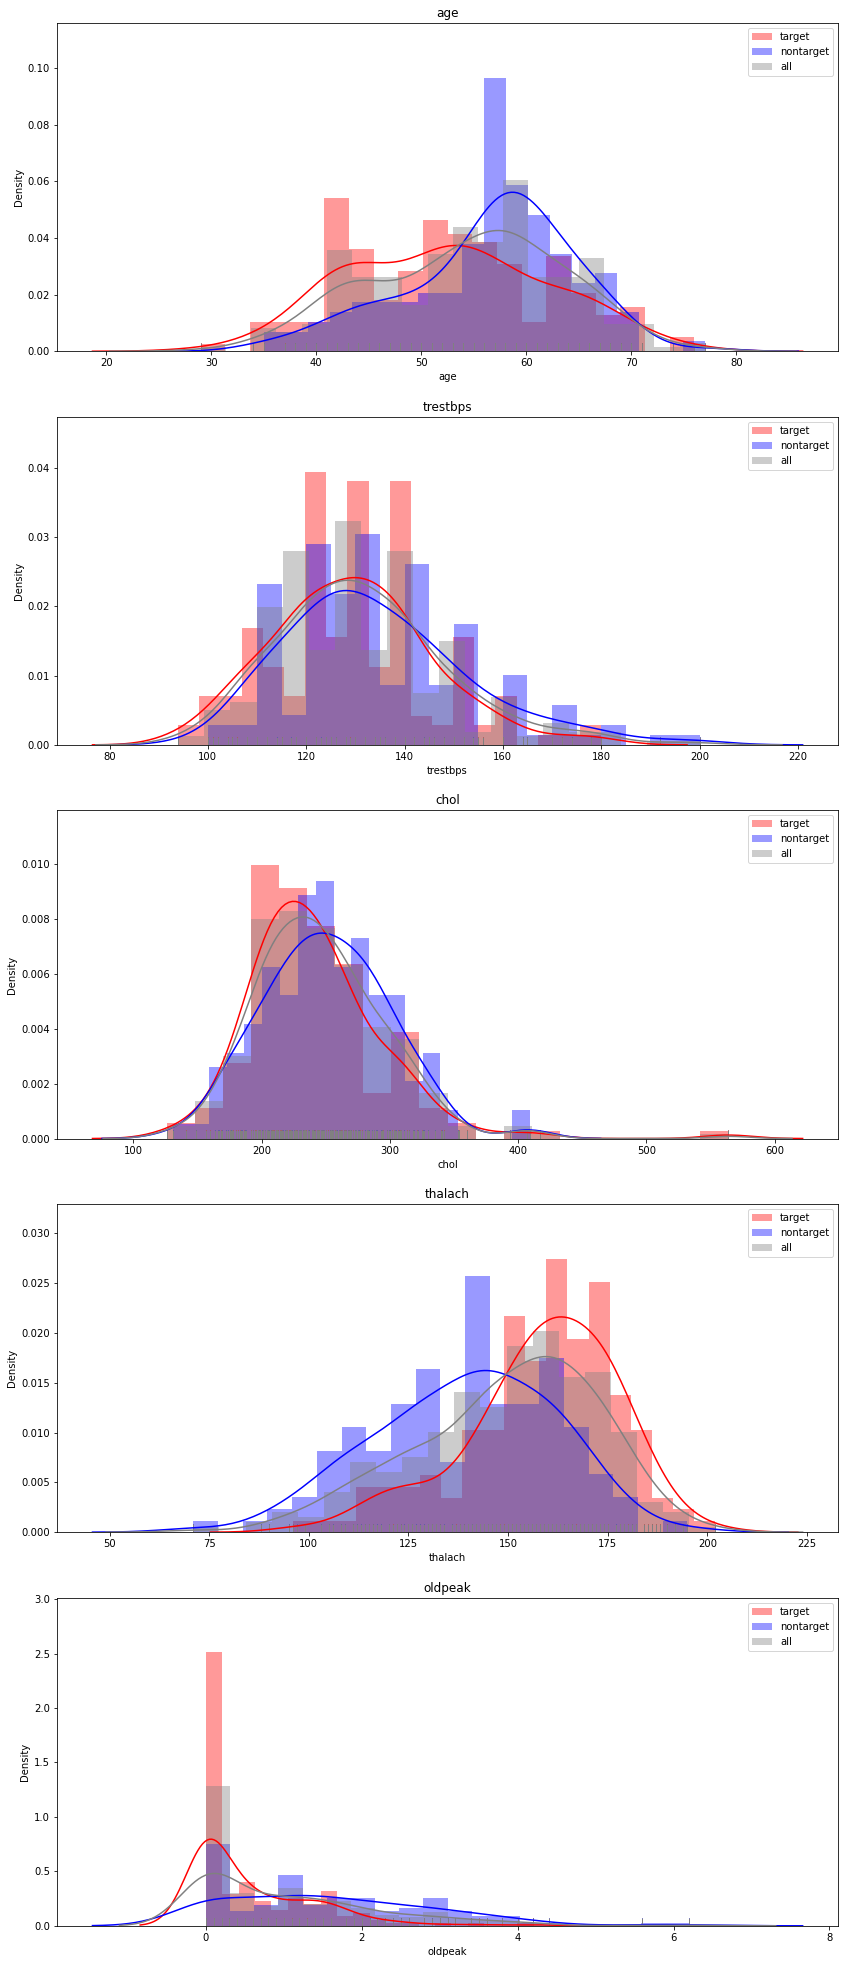

In [14]:
continually_index = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig, ax = plt.subplots(len(continually_index), 1, figsize=(14, 7*len(continually_index)))
list_couint = 1
for index in continually_index:
    plt.subplot(len(continually_index), 1, list_couint)
    plt.title(index)
    sns.distplot(target_df[index], bins=20, kde=True, rug=True, color='red', label='target')
    sns.distplot(nontarget_df[index], bins=20, kde=True, rug=True, color='blue', label='nontarget')
    sns.distplot(heart[index], bins=20, kde=True, rug=True, color='gray', label='all')
    plt.legend()
    list_couint += 1

### 위의 결과를 통해 알수 있는점
- 위의 그래프는 RED : 심장병이 있는 그룹, BLUE : 심장병이 없는 그룹, GRAY : 전체그룹 으로 나누어 시각적으로 각 그룹별 차이를 시각적으로 쉽게 보여준다. 위의 그래프에서 세 그래프가 비슷하게 곂칠경우 해당 데이터는 심장병에 영향을 끼치지 않는다고 유추할수 있으며, 큰 차이를 보일경우 심장병에 영향을 끼친다고 유추할 수 있다

- 심장병과 나이의 관계에서 젊은 사람들에게서 비교적 많이 발생한다는것을 유추할수 있었다.

- 심장병과 평상시 혈압과의 관계는 없다는것을 유추할수 있었다.
- 심장병과 혈중 콜레스테롤 농도간의 관계로써 심장병이 있는 사람들의 그룹이 조금더 낮은 혈중 콜레스테롤 농도를 가지는것을 알수 있었다
- 심장병을 가진 그룹에서 최대 심박수가 더 높게 나타나는것을 알수 있었다.
- 안정되기까지 운동으로 유발되는 ST의 경우 심장병이 있는 그룹이 더욱 빠르게 나타나는것으로 확인된다

## 2.3 양적 변수들의 상관관계를 파악하기 위한 상관계수 테이블

Text(0.5, 1.0, "All's Correlation Table")

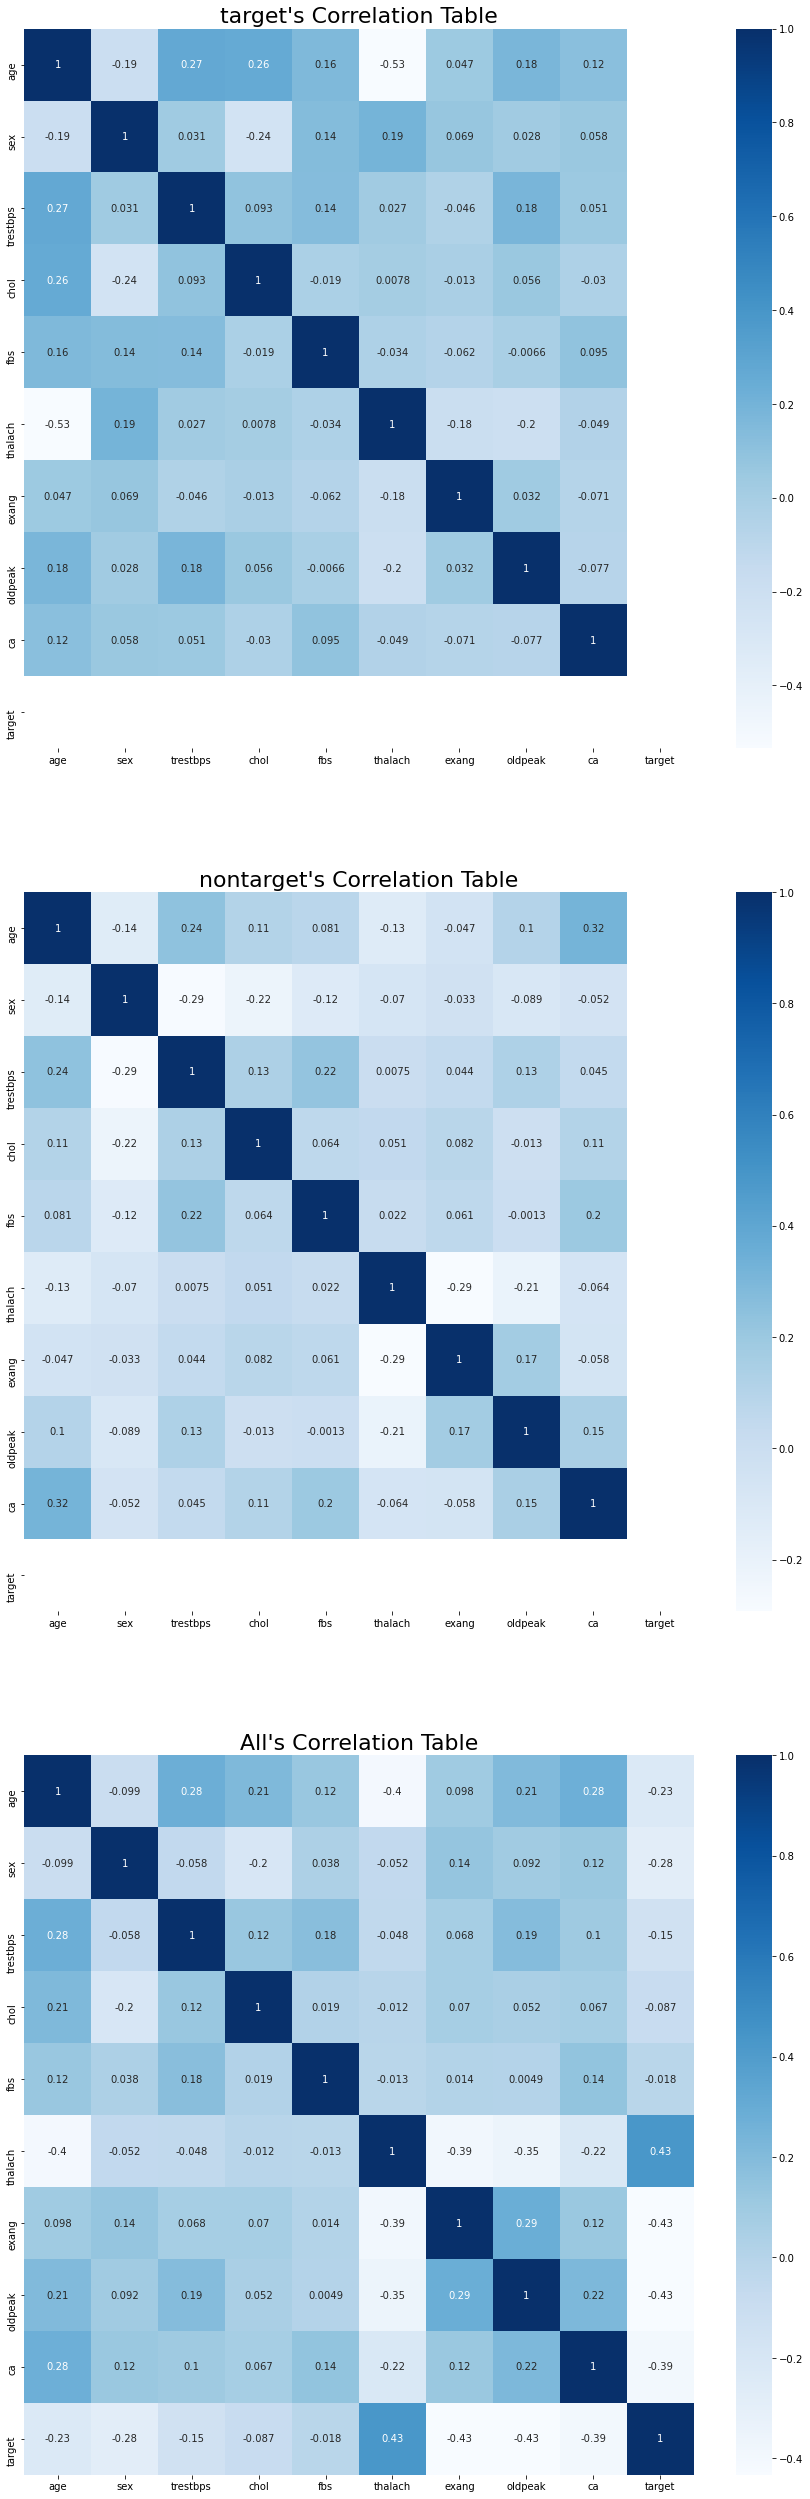

In [16]:
plt.figure(figsize=(15, 45))
plt.subplot(3, 1, 1)
sns.heatmap(target_df.dropna().corr(), annot = True, cmap='Blues')
plt.title('target\'s Correlation Table', fontsize=22)
plt.subplot(3, 1, 2)
sns.heatmap(nontarget_df.dropna().corr(), annot=True, cmap='Blues')
plt.title('nontarget\'s Correlation Table', fontsize=22)
plt.subplot(3, 1, 3)
sns.heatmap(heart.dropna().corr(), annot = True, cmap='Blues')
plt.title('All\'s Correlation Table', fontsize=22)

In [17]:
target_df.dropna().corr(), nontarget_df.dropna().corr(), heart.dropna().corr()

(               age       sex  trestbps      chol       fbs   thalach  \
 age       1.000000 -0.190618  0.274732  0.257504  0.155623 -0.533550   
 sex      -0.190618  1.000000  0.030504 -0.243833  0.140249  0.192361   
 trestbps  0.274732  0.030504  1.000000  0.093119  0.136672  0.027353   
 chol      0.257504 -0.243833  0.093119  1.000000 -0.019024  0.007773   
 fbs       0.155623  0.140249  0.136672 -0.019024  1.000000 -0.034273   
 thalach  -0.533550  0.192361  0.027353  0.007773 -0.034273  1.000000   
 exang     0.047143  0.069368 -0.045778 -0.013118 -0.061980 -0.182239   
 oldpeak   0.175137  0.027595  0.181446  0.055610 -0.006567 -0.195868   
 ca        0.117668  0.057667  0.050823 -0.030408  0.094906 -0.049096   
 target         NaN       NaN       NaN       NaN       NaN       NaN   
 
              exang   oldpeak        ca  target  
 age       0.047143  0.175137  0.117668     NaN  
 sex       0.069368  0.027595  0.057667     NaN  
 trestbps -0.045778  0.181446  0.050823     N

- 심장병이 있는 그룹에선 나이와 최대 심박수가 높은 음의 상관관계를 보였으며, 나이와 평상시 혈압간에 양의 상관도를 보였다
- 심장병이 없는 그룹에선 평상시 심박수와 나이가 양의 상관관계를 보였다.
- 그리고 전체 그룹에선 나이와 최대 심박수가 높은 음의 상관관계를 보이고, 안정되기까지 운동으로 유발되는 ST와 최대 심박수가 음의 상관관계를 보였다